In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [2]:
df = pd.read_csv('datasets/train.csv')

In [3]:
df['label'] = df['label'].astype(int)

In [4]:
x = df.drop(columns=["label","card","time","day","transaction_id"])

In [5]:
x 

,amount,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
0,2996.00,-422.837425,760.707943,58.275207,153.303414,7.202936,-10.915132,-3.458406,4.085058,2.441702,...,-0.471602,-0.140629,0.178008,-0.006310,-0.021356,-0.009839,-0.009304,0.000031,-0.021152,-0.000013
1,28.00,-394.596676,-372.770445,-15.286916,-76.575438,104.952037,-37.735253,-12.194233,3.442883,6.927474,...,0.778082,1.560081,-0.172821,-0.032460,-0.397619,0.025821,-0.094427,-0.009676,-0.000693,0.000025
2,125.78,-437.242768,-327.536604,146.471711,7.189410,-118.581570,8.324652,-3.434593,3.696566,9.293879,...,-0.548022,-0.276188,-0.304188,-0.761782,-0.024227,0.149462,-0.128246,-0.005386,-0.001266,-0.000331
3,1.20,-329.477487,-317.287401,-609.106664,-100.007393,-111.556155,-60.209254,-3.297218,2.897522,6.158783,...,-0.053544,1.075226,-0.679411,0.029796,0.957184,0.404513,0.020177,-0.007533,-0.022051,-0.000316
4,31.05,-439.454769,-360.694265,388.431870,41.495894,122.630552,-87.962271,-15.032204,4.315014,-9.432846,...,0.293755,0.554647,-0.802328,0.170290,-0.048390,-0.029278,-0.178744,-0.018492,-0.022543,-0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593091,34.90,9457.161439,672.448452,95.111019,-291.289051,-9.894481,76.746030,6.531892,-6.413068,-5.395322,...,0.914444,1.552135,0.578813,-0.082312,0.010247,0.131628,0.038943,-0.004550,0.048141,0.000067
1593092,60.40,-441.008438,639.200537,311.526723,-249.521636,-11.657303,68.884666,5.231016,-15.674415,-5.143300,...,-0.751633,0.309864,0.517899,-0.013770,0.019830,0.103752,-0.021146,-0.002228,0.001442,-0.000023
1593093,23.30,-436.169606,646.253188,146.985152,-259.263824,-13.901599,70.526210,5.524197,4.105050,-4.806638,...,-1.485556,-0.239709,0.533735,0.006483,0.020180,0.095437,0.000299,-0.002369,0.001129,-0.000031
1593094,5.20,-422.636754,650.769844,42.350745,-265.491708,-15.335591,71.545871,5.678248,3.960834,-4.759558,...,-0.659200,0.347368,0.534015,-0.008933,0.023246,0.102755,-0.000100,-0.004815,0.001087,-0.000017


In [6]:
y = df['label']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
log_classify = LogisticRegression(random_state=1,max_iter=1000)

In [9]:
param_dict = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
log_model = GridSearchCV(log_classify, param_dict, cv=5, scoring='accuracy')

In [10]:
scaler = preprocessing.StandardScaler().fit(x_train)
X_scaled = scaler.transform(x_train)

In [11]:
log_model.fit(X_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=1),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},
             scoring='accuracy')

In [12]:
y_pred=log_model.predict(x_test)

In [13]:
#check the accuracy of the model
print(accuracy_score(y_test,y_pred))

0.4560448182788274


In [14]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[145070 173315]
 [     0    235]]
              precision    recall  f1-score   support

           0       1.00      0.46      0.63    318385
           1       0.00      1.00      0.00       235

    accuracy                           0.46    318620
   macro avg       0.50      0.73      0.31    318620
weighted avg       1.00      0.46      0.63    318620



In [15]:
A = confusion_matrix(y_test,y_pred)

In [16]:
TN = A[0,0]
FP = A[0,1]
FN = A[1,0]
TP = A[1,1]

In [1]:
DR = TP / (TP + FN)
DR

NameError: name 'TP' is not defined

In [18]:
FPR = FP / TP
FPR

737.5106382978723

In [19]:
a = pd.DataFrame(x_test.iloc[0]).transpose()

In [20]:
log_model.predict_proba(a)

array([[0., 1.]])

In [21]:
rfc = RandomForestClassifier(n_estimators=200)

In [22]:
rfc.fit(X_scaled,y_train)

RandomForestClassifier(n_estimators=200)

In [44]:
y_pred_2 = rfc.predict(X_scaled_test)

In [45]:
B = confusion_matrix(y_test,y_pred_2)

In [52]:
print(B)
print(classification_report(y_test,y_pred_2))

[[318372     13]
 [   209     26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    318385
           1       0.67      0.11      0.19       235

    accuracy                           1.00    318620
   macro avg       0.83      0.56      0.59    318620
weighted avg       1.00      1.00      1.00    318620



In [47]:
TN = B[0,0]
FP = B[0,1]
FN = B[1,0]
TP = B[1,1]

In [48]:
DR = TP / (TP + FN)
DR

0.11063829787234042

In [49]:
FPR = FP / TP
FPR

0.5

In [43]:
rfc.predict_proba(pd.DataFrame(X_scaled_test[0]).transpose())

array([[0.84, 0.16]])

In [33]:
scaler_test = preprocessing.StandardScaler().fit(x_test)
X_scaled_test = scaler_test.transform(x_test)

In [35]:
scaler_test

StandardScaler()

In [38]:
X_scaled_test[0]

array([-0.15881961, -0.20007966, -0.90660532, -0.03949583,  0.17921153,
       -1.55025524,  0.70750344,  0.01034525, -1.44027257,  0.59553442,
       -0.73093638, -0.08951994, -0.50429854, -1.32379064,  0.28777915,
       -0.25512341, -0.95167942, -0.0436438 , -1.7433423 ,  0.38139846,
        0.13477689, -0.48039145, -0.01123823,  0.1728185 , -0.06325776])

In [55]:
C = rfc.predict_proba(pd.DataFrame(X_scaled_test))

In [73]:
C[:0]

array([], shape=(0, 2), dtype=float64)

In [79]:
Fraud = C[:,0]

In [80]:
Legitimate = C[:,1]

In [82]:
Fraud

array([0.84 , 1.   , 1.   , ..., 0.755, 1.   , 1.   ])

(array([9.00000e+00, 1.30000e+01, 1.50000e+01, 1.90000e+01, 1.02000e+02,
        5.65000e+02, 3.09360e+04, 1.48209e+05, 2.20450e+04, 1.16707e+05]),
 array([0.275 , 0.3475, 0.42  , 0.4925, 0.565 , 0.6375, 0.71  , 0.7825,
        0.855 , 0.9275, 1.    ]),
 <BarContainer object of 10 artists>)

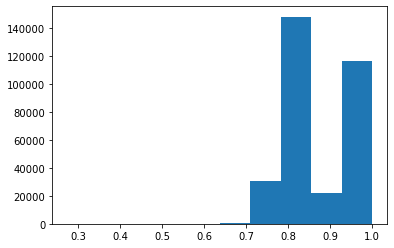

In [84]:
plt.hist(Fraud)

(array([1.16707e+05, 1.35430e+04, 1.56710e+05, 3.08390e+04, 6.63000e+02,
        9.80000e+01, 2.30000e+01, 1.50000e+01, 1.30000e+01, 9.00000e+00]),
 array([0.    , 0.0725, 0.145 , 0.2175, 0.29  , 0.3625, 0.435 , 0.5075,
        0.58  , 0.6525, 0.725 ]),
 <BarContainer object of 10 artists>)

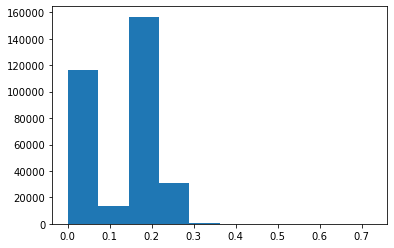

In [85]:
plt.hist(Legitimate)

In [86]:
C 

array([[0.84 , 0.16 ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       ...,
       [0.755, 0.245],
       [1.   , 0.   ],
       [1.   , 0.   ]])

In [94]:
if C[0][1] > 0.3:
    fraud.append

0.16

In [96]:
x_test

,amount,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
1017964,30.00,-437.383069,-309.805695,-14.890102,27.657271,-129.113093,47.254991,-2.672462,-16.517507,4.112847,...,-0.212295,-0.641827,-0.042537,-0.802462,0.116278,0.041095,-0.103817,-0.004584,0.004775,-0.000382
1565056,1000.00,-427.954810,784.067019,-507.226787,120.160137,-0.725520,-5.504378,-2.506086,3.409616,-2.458250,...,0.268834,0.464247,0.864290,-0.064558,0.049819,0.350153,0.074174,0.004530,0.001907,-0.000017
412867,670.00,-309.672125,764.313104,22.364296,144.148967,8.752532,-17.110234,-3.616199,4.000220,7.753575,...,0.436648,-1.579076,-2.463595,0.291279,0.172073,-0.884220,-0.075347,-0.000780,-0.012635,0.000044
1138202,45.21,-436.304640,-325.561009,-21.647534,65.871075,102.007083,-17.937610,-13.938180,-16.553174,4.197246,...,-0.774406,0.191584,0.623061,-0.269502,0.556055,-0.168606,1.305309,-0.212242,0.003812,-0.000162
484986,122.00,495.956853,710.250354,33.299838,-64.751435,67.512620,-264.250753,-6.625461,4.554683,3.853919,...,-0.351231,-0.107872,0.265033,-0.051964,-0.184434,0.157441,0.031936,0.010511,-0.001851,0.000029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113974,862.79,-438.589296,762.776655,9.356057,150.453091,6.503213,-10.501108,-3.443436,-16.980791,2.186234,...,0.297948,0.402760,0.175214,-0.027068,-0.023836,-0.004610,-0.016008,0.000849,-0.022359,-0.000006
406368,1207.54,-434.355743,747.905540,356.380876,170.967333,11.299987,-13.804714,-3.895102,4.483408,2.312707,...,0.279865,0.451333,0.153478,-0.021017,-0.014742,0.002948,-0.037936,-0.003364,0.000868,0.000015
417400,39.95,-435.959303,-325.177021,90.640426,3.697419,-119.281660,8.939752,-3.320368,3.657758,6.727003,...,-0.493205,-0.175450,0.211150,1.084947,-0.565538,-0.638177,-0.094275,-0.003791,0.001147,-0.000031
830868,2558.47,-432.710603,761.759015,33.305442,151.854128,6.846066,-10.703065,-3.448898,-5.944105,2.318428,...,-1.295340,-0.749905,0.185931,0.006245,-0.028442,-0.020263,-0.000890,0.004448,0.000798,-0.000018


In [135]:
df2 = pd.read_csv('datasets/test.csv')

In [136]:
df2 = df2.drop(columns=['card','day','time'])

In [137]:
df2['label'] = df2['label'].astype(int)

In [138]:
df2_ = df2.set_index('transaction_id')

In [139]:
x_val = df2_.drop(columns='label')

In [140]:
x_val

,amount,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
transaction_id,,,,,,,,,,,,,,,,,,,,,
1488269,35.00,-434.944428,-323.343970,-110.782931,44.730339,70.248569,119.398880,-10.043585,-16.991429,4.501982,...,0.838937,1.424193,-0.130088,-0.027653,-0.265320,-0.106963,-0.105680,-0.012755,0.009492,-0.000006
1488270,54.50,-435.145707,-338.357631,321.252613,8.252579,-113.567809,-4.473936,-3.810175,3.988520,7.083202,...,0.811475,-0.350513,0.432199,0.961994,-0.110770,0.012510,-0.093803,-0.004067,-0.001812,-0.000294
1488271,168.97,-438.449846,-328.748121,187.307614,11.108991,-118.378902,10.306475,-3.396746,3.818490,4.784027,...,0.593810,0.005328,-0.076905,-0.843179,0.091032,0.018876,0.681332,0.583736,-0.024366,-0.000364
1488272,18.28,-422.874818,-330.531132,-314.515513,-0.125700,112.963625,-81.154786,-14.003739,3.369232,-9.124203,...,0.422270,0.544350,-0.759162,0.169211,-0.054523,-0.038898,-0.129540,-0.016737,0.006011,0.000011
1488273,11.05,-422.874818,-330.531132,-314.515513,-0.125700,112.963625,-81.154786,-14.003739,3.369232,-9.124203,...,0.422270,0.544350,-0.759162,0.169211,-0.054523,-0.038898,-0.129540,-0.016737,0.006011,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396413,1.00,-383.874981,674.101687,-499.927242,-297.676146,-22.780927,76.812412,6.474047,3.227120,-4.521048,...,0.248373,0.929000,0.561247,-0.025105,0.022467,0.104120,0.030196,-0.006194,0.001346,-0.000004
2396414,1.15,-383.874981,674.101687,-499.927242,-297.676146,-22.780927,76.812412,6.474047,3.227120,-4.521048,...,0.248373,0.929000,0.561247,-0.025105,0.022467,0.104120,0.030196,-0.006194,0.001346,-0.000004
2396415,91.65,-406.697464,658.710412,-142.049574,-276.443908,-17.865570,73.338430,5.949271,3.715151,-4.680835,...,-1.430883,-0.242479,0.551606,0.005911,0.017622,0.091532,0.020637,-0.001663,0.000896,-0.000032


In [141]:
df2

,transaction_id,amount,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,label
0,1488269,35.00,-434.944428,-323.343970,-110.782931,44.730339,70.248569,119.398880,-10.043585,-16.991429,...,1.424193,-0.130088,-0.027653,-0.265320,-0.106963,-0.105680,-0.012755,0.009492,-0.000006,0
1,1488270,54.50,-435.145707,-338.357631,321.252613,8.252579,-113.567809,-4.473936,-3.810175,3.988520,...,-0.350513,0.432199,0.961994,-0.110770,0.012510,-0.093803,-0.004067,-0.001812,-0.000294,0
2,1488271,168.97,-438.449846,-328.748121,187.307614,11.108991,-118.378902,10.306475,-3.396746,3.818490,...,0.005328,-0.076905,-0.843179,0.091032,0.018876,0.681332,0.583736,-0.024366,-0.000364,0
3,1488272,18.28,-422.874818,-330.531132,-314.515513,-0.125700,112.963625,-81.154786,-14.003739,3.369232,...,0.544350,-0.759162,0.169211,-0.054523,-0.038898,-0.129540,-0.016737,0.006011,0.000011,0
4,1488273,11.05,-422.874818,-330.531132,-314.515513,-0.125700,112.963625,-81.154786,-14.003739,3.369232,...,0.544350,-0.759162,0.169211,-0.054523,-0.038898,-0.129540,-0.016737,0.006011,0.000011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803317,2396413,1.00,-383.874981,674.101687,-499.927242,-297.676146,-22.780927,76.812412,6.474047,3.227120,...,0.929000,0.561247,-0.025105,0.022467,0.104120,0.030196,-0.006194,0.001346,-0.000004,0
803318,2396414,1.15,-383.874981,674.101687,-499.927242,-297.676146,-22.780927,76.812412,6.474047,3.227120,...,0.929000,0.561247,-0.025105,0.022467,0.104120,0.030196,-0.006194,0.001346,-0.000004,0
803319,2396415,91.65,-406.697464,658.710412,-142.049574,-276.443908,-17.865570,73.338430,5.949271,3.715151,...,-0.242479,0.551606,0.005911,0.017622,0.091532,0.020637,-0.001663,0.000896,-0.000032,0
803320,2396416,91.65,-434.011077,672.837908,-473.270131,-295.952878,-22.438011,76.525526,6.430250,3.265206,...,0.926201,0.559340,-0.024786,0.022773,0.104380,0.028073,-0.006265,0.001838,-0.000004,0


In [111]:
y_val = df2['label']

In [173]:
scaler_val = preprocessing.StandardScaler().fit(x_val)
X_scaled_val = scaler_test.transform(x_val)

In [174]:
Prob = rfc.predict_proba(X_scaled_val)

In [115]:
y_pred_val = rfc.predict(X_scaled_val)

In [185]:
print(confusion_matrix(y_val,y_pred_val))
print(classification_report(y_val,y_pred_val))

[[802647     25]
 [   617     33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    802672
           1       0.57      0.05      0.09       650

    accuracy                           1.00    803322
   macro avg       0.78      0.53      0.55    803322
weighted avg       1.00      1.00      1.00    803322



In [117]:
Fraud = Prob[:,0]

In [118]:
Legitimate = Prob[:,1]

(array([9.00000e+00, 1.30000e+01, 3.00000e+01, 3.40000e+01, 9.40000e+01,
        1.48700e+03, 5.23270e+04, 3.74098e+05, 8.32830e+04, 2.91947e+05]),
 array([0.24 , 0.316, 0.392, 0.468, 0.544, 0.62 , 0.696, 0.772, 0.848,
        0.924, 1.   ]),
 <BarContainer object of 10 artists>)

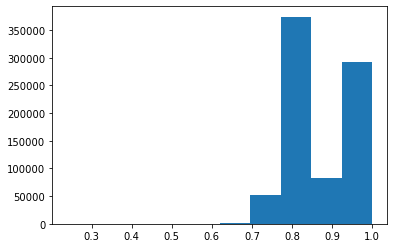

In [119]:
plt.hist(Fraud)

(array([2.91947e+05, 8.32820e+04, 3.74084e+05, 5.23420e+04, 1.46500e+03,
        1.16000e+02, 3.40000e+01, 3.00000e+01, 1.30000e+01, 9.00000e+00]),
 array([0.   , 0.076, 0.152, 0.228, 0.304, 0.38 , 0.456, 0.532, 0.608,
        0.684, 0.76 ]),
 <BarContainer object of 10 artists>)

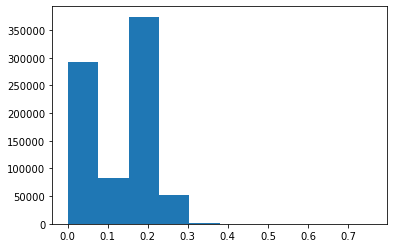

In [120]:
plt.hist(Legitimate)

In [158]:
pred_with_tresh_03 = []

In [162]:
for i in range(len(X_scaled_val)):
    Prob = rfc.predict_proba(pd.DataFrame(X_scaled_val[i]).transpose())
    if Prob[0][0] > 3:
        pred_with_tresh_03.append(1)
    else:
        pred_with_tresh_03.append(0)
    break

In [153]:
Prob[0][0]

0.805

In [235]:
threshold = 0.3

In [236]:
pred_with_tresh_03 = (Prob[:,1]>=threshold).astype('int')

In [237]:
confusion_matrix(y_val,pred_with_tresh_03)

array([[800879,   1793],
       [   580,     70]], dtype=int64)

In [238]:
A = confusion_matrix(y_val,pred_with_tresh_03)

In [239]:
len(pred_with_tresh_03)

803322

In [240]:
len(y_test)

318620

In [241]:
TN = A[0,0]
FP = A[0,1]
FN = A[1,0]
TP = A[1,1]

In [242]:
DR = TP / (TP + FN)
DR

0.1076923076923077

In [243]:
FPR = FP / TP
FPR

25.614285714285714